# SVM (Support Vector Machine)
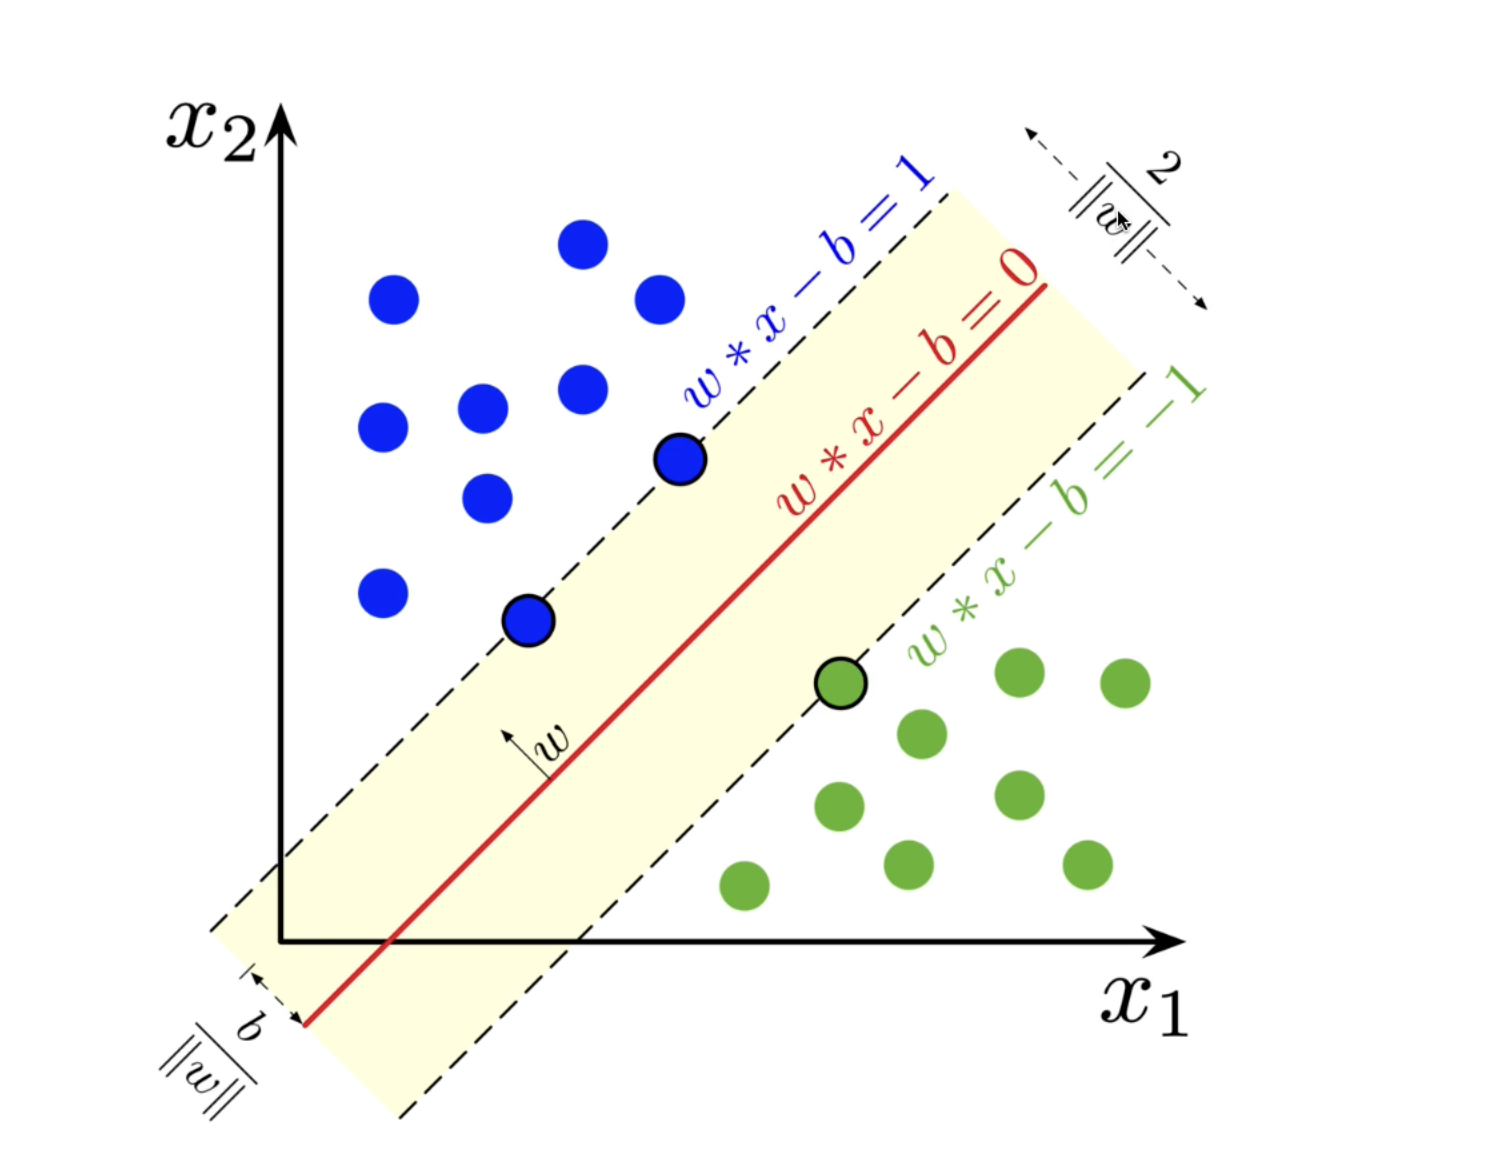
- Draws a best fit line shown as red.
- Draws 2 Support Vectors up and down (assuming we are in a 2d space)
- We want to minimize the margin w which will show us how good we seperate different classes

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sys 

%matplotlib inline
sys.path.append('/Users/user/Desktop/Projects/data-science/utils')


In [2]:
from SetupDataFrame import SetupDataFrame
from AnalyzeDataFrame import AnalyzeDataFrame
from VisualizeDataFrame import VisualizeDataFrame
from EvalModel import EvalModel

In [3]:
setup_df        =   SetupDataFrame()
analyze_df      =   AnalyzeDataFrame()
visualize_df    =   VisualizeDataFrame()
eval_model      =   EvalModel()

In [4]:
df = setup_df.setup_ml(file_dir="9-email_classification_svm.csv")

In [5]:
analyze_df.analyze_df(df)

**************************************** COLUMNS *****************************************
Index(['subject_formality_score', 'sender_relationship_score', 'email_type'], dtype='object')
***************************** First 5 Data in the Dataframe ******************************
   subject_formality_score  sender_relationship_score  email_type
0                -1.496790                   0.779258           0
1                -1.217610                   0.889601           0
2                -0.375945                  -0.823324           1
3                 0.639609                  -0.362827           1
4                -1.342836                  -1.040502           1
**************************************** DF INFO *****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_formali

In [6]:
cat_col, num_col, cat_but_car_col = analyze_df.grab_col_names(df)

Observations: 1000
Variables: 3
cat_cols: 1
num_cols: 2
cat_but_car: 0
num_but_cat: 1

Categorical Cols: ['email_type']

Numerical Cols: ['subject_formality_score', 'sender_relationship_score']

Categorical but cardinal Cols: []


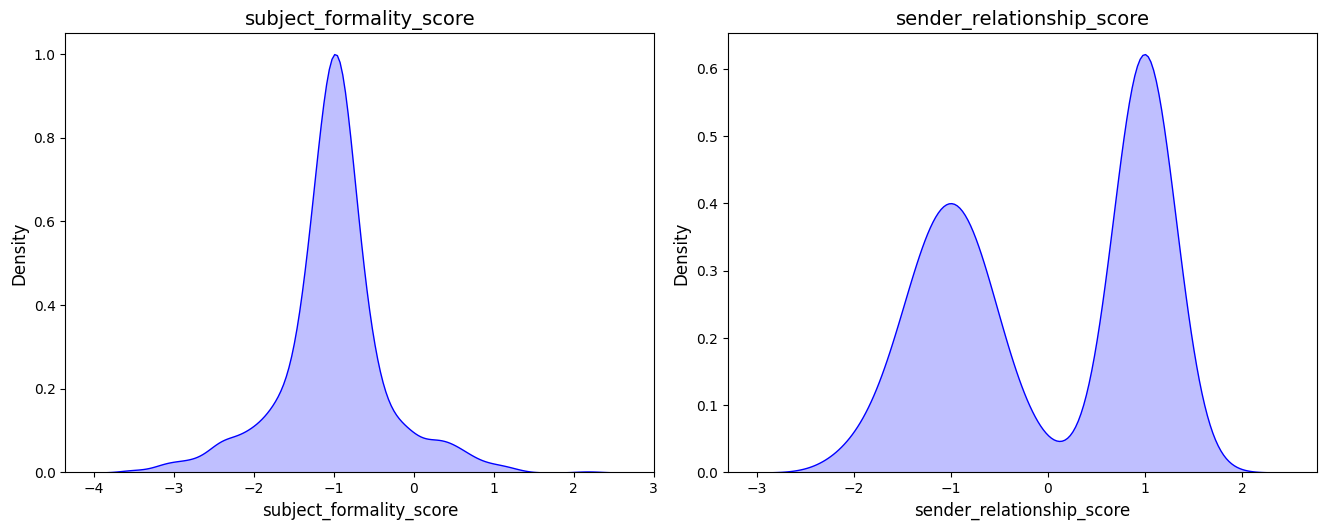

In [7]:
visualize_df.subplot_maker(df, num_col)

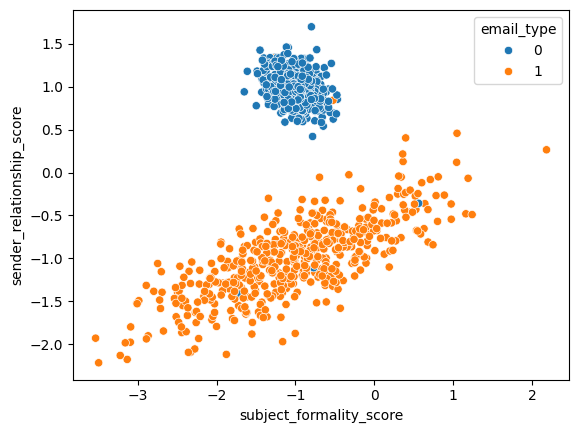

In [9]:
visualize_df.scatterplot_maker(df, 
                               "subject_formality_score", 
                               "sender_relationship_score", 
                               "email_type")

In [11]:
X = df.drop("email_type", axis=1)
y = df["email_type"]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.svm import SVC, SVR

model = SVC(kernel="linear")

model.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
y_pred = model.predict(X_test)

In [15]:
eval_model.eval_class_model(X_test, y_test, model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       151

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

[[149   0]
 [  0 151]]


(1.0, 1.0, 1.0, 1.0, 1.0)